### Problem 2: Diffusion Model Explorations

As extensively discussed in class, the drift-diffusion model (DDM) generates two response time (RT) distributions, one for each boundary (i.e., lower and upper boundaries). This exercise asks you to first explore a somewhat counterintuitive question about the basic DDM: What differences between the means of the two RT distributions does the the model predict?

To approach this question from a simulation-based perspective, you need to repeatedly solve the forward problem with different parameter configurations and collect the two summary statistics, namely, the two empirical means of the resulting RT distributions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

First, choose a suitable configuration of the four parameters and vary only the drift rates within a reasonable range (e.g.,v ∈ [0.5 − 1.5]) for a total of 25 different drift rates. Make sure that your parameterizations can generate a sufficient number of RTs for both distributions and you don’t end up with the process only reaching the upper boundary.

In [ ]:
# Drift Rates
num_drift_rates = 25
drift_rates = np.linspace(0.5, 1.5, num_drift_rates)

boundary = 1.0
starting_point = 0
noise = 0.1

def simulate_ddm(drift, num_trials, boundary, noise):
    """Simulate Drift-Diffusion Model for a given drift rate."""
    reaction_times = []
    decisions = []

    for _ in range(num_trials):
        position = starting_point
        time = 0
        while abs(position) < boundary:
            position += drift * 0.01 + np.random.randn() * noise
            time += 1
        reaction_times.append(time)
        decisions.append(1 if position >= boundary else 0)

    return np.array(reaction_times), np.array(decisions)

Second, for each of your parameter configurations, generate N = 2000 synthetic observations and estimate the means of the two distributions.

    Drift Rate  Upper Boundary RT Mean  Lower Boundary RT Mean
0     0.500000              104.048764              101.298211
1     0.541667              102.240972              100.410901
2     0.583333               98.679404               99.127193
3     0.625000               99.097778               91.628235
4     0.666667               95.807147               92.700265
5     0.708333               96.031746               94.687845
6     0.750000               91.496984               90.002924
7     0.791667               92.305854               95.042945
8     0.833333               88.361988               97.944828
9     0.875000               86.701895               91.517375
10    0.916667               87.383429               91.988000
11    0.958333               85.061937               80.602679
12    1.000000               82.228460               81.462687
13    1.041667               80.733556               84.956311
14    1.083333               81.651047               80

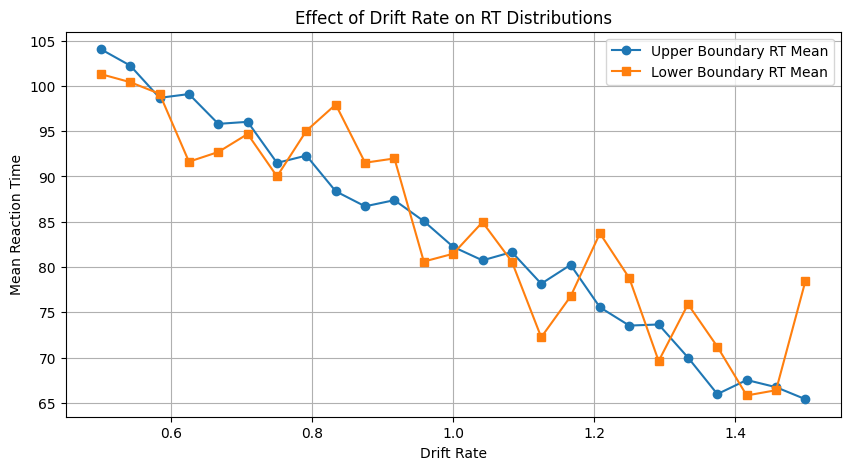

In [ ]:
# Number of simulations per drift rates
num_trials = 2000

upper_means = []
lower_means = []

for drift in drift_rates:
    rt, decisions = simulate_ddm(drift, num_trials, boundary, noise)
    upper_means.append(np.mean(rt[decisions == 1]))
    lower_means.append(np.mean(rt[decisions == 0]))

# Create a DataFrame to display results
df_results = pd.DataFrame({
    'Drift Rate': drift_rates,
    'Upper Boundary RT Mean': upper_means,
    'Lower Boundary RT Mean': lower_means
})

print(df_results)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(drift_rates, upper_means, label='Upper Boundary RT Mean', marker='o')
plt.plot(drift_rates, lower_means, label='Lower Boundary RT Mean', marker='s')
plt.xlabel('Drift Rate')
plt.ylabel('Mean Reaction Time')
plt.title('Effect of Drift Rate on RT Distributions')
plt.legend()
plt.grid()
plt.show()

What do you observe regarding the mean difference? Describe and interpret your results. (4 points)

### Student Answer
The results show that as the drift rate increases, the mean reaction times (RTs) for both boundaries decrease. This makes sense with our expectation that higher drift rates lead to faster decision-making, as the process reaches one of the decision boundaries more quickly.

Interestingly, while the upper and lower boundary RTs follow a similar downward trend, there are some fluctuations at high drift rates where the lower boundary RTs exhibit more variability.

All in all, the decreasing trend in RTs confirms that increasing the drift rate leads to more efficient decision-making. The observed variations in mean differences at different drift rates could reflect cases where decisions are disproportionately reaching one boundary over the other.

In a similar spirit (keeping all parameters fixed and varying one), explore the effects of each of the parameters on the means and standard deviations of the simulated RT distributions, quantify and describe your results. (4 points)

In [ ]:
parameters = {'Boundary': [0.5, 1.0, 1.5], 'Noise': [0.05, 0.1, 0.2]}
results = {}

for param, values in parameters.items():
    for value in values:
        if param == 'Boundary':
            boundary = value
        elif param == 'Noise':
            noise = value

        upper_means = []
        lower_means = []

        for drift in drift_rates:
            rt, decisions = simulate_ddm(drift, num_trials, boundary, noise)
            upper_means.append(np.mean(rt[decisions == 1]))
            lower_means.append(np.mean(rt[decisions == 0]))

        results[f"{param}={value}"] = (upper_means, lower_means)

print("Exploration of Parameter Effects:")
for key, (upper, lower) in results.items():
    print(f"{key}: Upper Mean RT={np.mean(upper):.2f}, Lower Mean RT={np.mean(lower):.2f}")


Exploration of Parameter Effects:
Boundary=0.5: Upper Mean RT=28.41, Lower Mean RT=28.62
Boundary=1.0: Upper Mean RT=84.49, Lower Mean RT=83.41
Boundary=1.5: Upper Mean RT=146.75, Lower Mean RT=144.82
Noise=0.05: Upper Mean RT=169.54, Lower Mean RT=nan
Noise=0.1: Upper Mean RT=145.97, Lower Mean RT=145.78
Noise=0.2: Upper Mean RT=62.17, Lower Mean RT=61.85


### Student Answer
As the boundary increases from **0.5** to **1.5**, the mean reaction times (RTs) rise significantly. At **Boundary = 0.5**, decisions are made quickly (\~28.5), while at **Boundary = 1.5**, RTs increase by almost five times (\~146.7). This makes sense since larger boundaries require more evidence accumulation, leading to longer decision times.  

Higher noise, on the other hand, speeds up decisions. At **Noise = 0.05**, the upper boundary RT is **169.54**, while the lower boundary RT is **NaN**, suggesting a strong bias toward the upper boundary. As noise increases to **0.2**, RTs drop to **~62**, showing that greater randomness helps reach a decision faster.  

Overall, **boundary size controls decision difficulty**, requiring more time for higher values. **Noise increases variability**, sometimes making decisions faster but also introducing bias at low levels.